In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
drive.mount('/content/gdrive')

#Importing the dataset, showing the head of the dataset then some general information

df=pd.read_csv("/content/gdrive/MyDrive/Gomycode/titanic-passengers.csv",sep=";")
print(df.head())
df.info()

Mounted at /content/gdrive
   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data c

In [ ]:
#Data preprocessing

print(df.isnull().sum().sum())
print(df.isnull().sum())
df['Age'].fillna(df['Age'].mean(),inplace=True)
print(df["Embarked"].value_counts())
print(df["Cabin"].value_counts())
df["Embarked"].fillna("S",inplace=True)
df["Cabin"].fillna("G6",inplace=True)
#df.isnull().sum()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Survived"]= df["Survived"].replace('No', 0)
df["Survived"]= df["Survived"].replace('Yes', 1)
#df['Sex']=encoder.fit_transform(df['Sex'])
df['Cabin']=encoder.fit_transform(df['Cabin'])
#df['Embarked']=encoder.fit_transform(df['Embarked'])
df['Ticket']=encoder.fit_transform(df['Ticket'])
print(df.info())

866
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null  

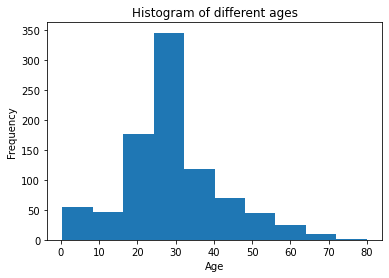

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


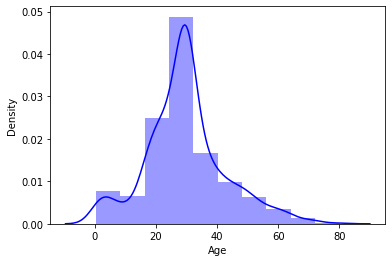

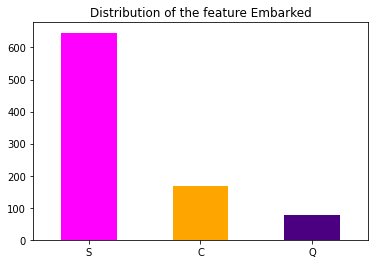

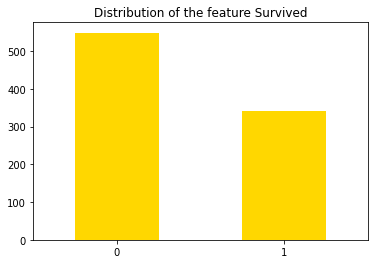

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


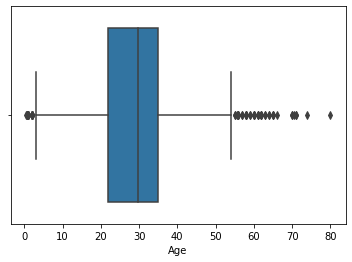

In [ ]:
#Studying the distribution of the most important features

plt.title("Histogram of different ages")
plt.xlabel("Age")
df['Age'].plot.hist()
plt.show()
sns.distplot(df["Age"], bins=10,hist=True, kde=True, color="blue")
plt.show()
vc=df["Embarked"].value_counts()
plt.title("Distribution of the feature Embarked")
vc.plot.bar(rot=0,color=['magenta','orange','indigo'])
plt.show()
vc2=df["Survived"].value_counts()
plt.title("Distribution of the feature Survived")
vc2.plot.bar(rot=0,color="gold")
plt.show()
sns.boxplot(df["Age"])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


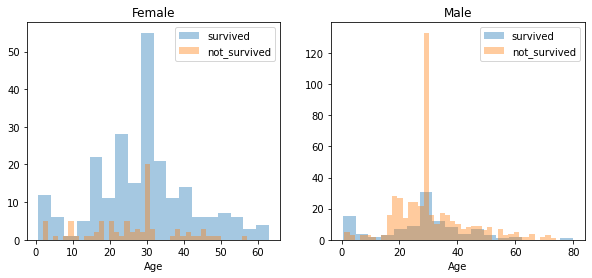

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


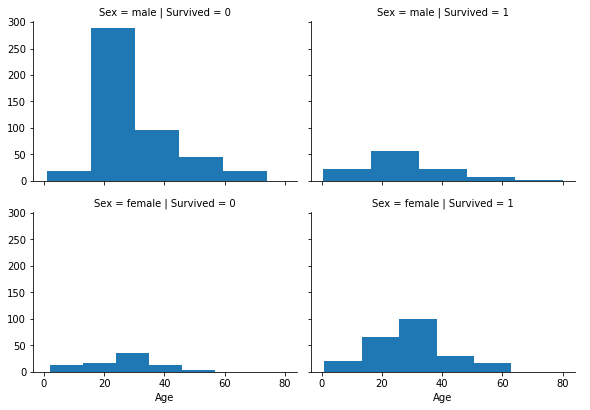

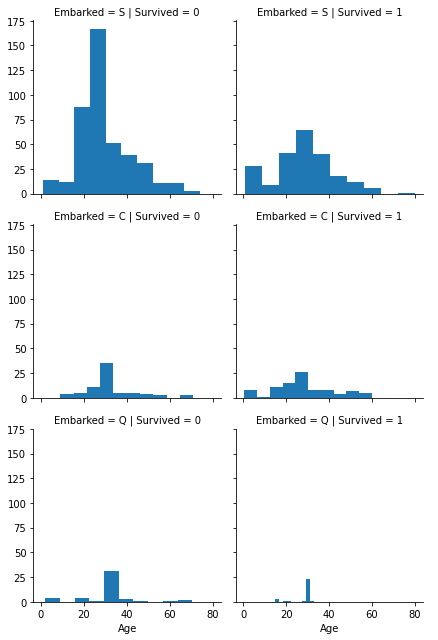

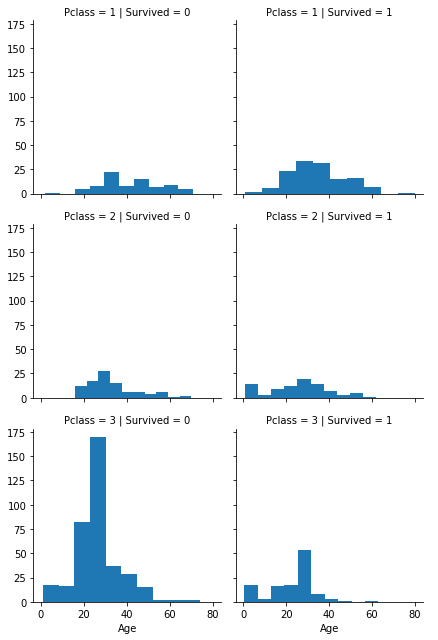

In [ ]:
#Visualize the correlation between Sex and Age in a plot of your choosing

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']== 1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']== 0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']== 1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde =False)
ax = sns.distplot(men[men['Survived']== 0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde =False)
ax.legend()
ax.set_title('Male')
plt.show()

grid = sns.FacetGrid(df, row="Sex", col="Survived", size=2.9, aspect=1.4)
grid.map(plt.hist,"Age",bins=5)
grid.add_legend()

# Choosing another parametr
g = sns.FacetGrid (df, col = 'Survived', row = 'Embarked')
g.map (plt.hist, 'Age', bins = 10)
g .add_legend ()
plt.show()
g = sns.FacetGrid (df, col = 'Survived', row = 'Pclass')
g.map (plt.hist, 'Age', bins = 10)
g .add_legend ()
plt.show()

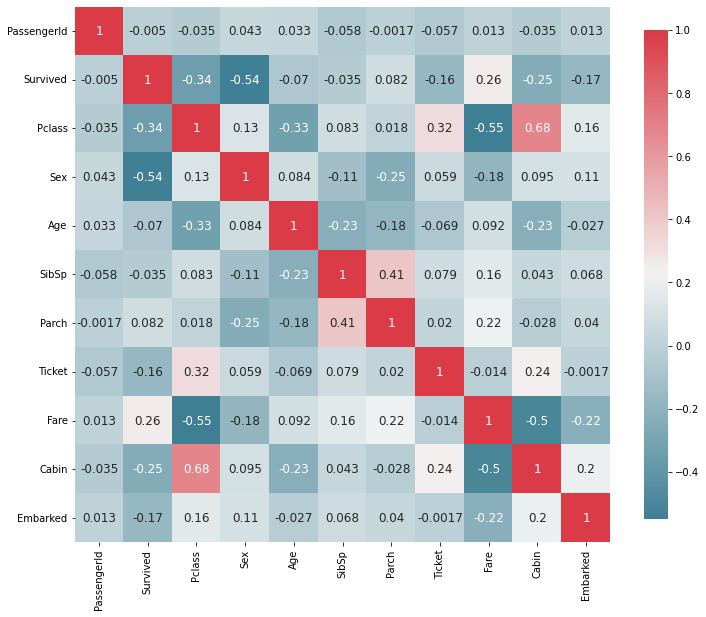

In [ ]:
#Heatmap
df['Sex']=encoder.fit_transform(df['Sex'])
df['Embarked']=encoder.fit_transform(df['Embarked'])
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [ ]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived

print(df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean())


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [ ]:
#Dropping useless columns
df1=df.drop(['Cabin','Ticket'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# Creation of new column Title
df1['Title'] = 0
df1['Title'] = df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#Visualize the correlation between Title and other features
print(df1[['Title', 'Survived']].groupby(['Title'], as_index=True).mean())
print(df1[['Title', 'Age']].groupby(['Title'], as_index=True).mean())

          Survived
Title             
Capt      0.000000
Col       0.500000
Countess  1.000000
Don       0.000000
Dr        0.428571
Jonkheer  0.000000
Lady      1.000000
Major     0.500000
Master    0.575000
Miss      0.697802
Mlle      1.000000
Mme       1.000000
Mr        0.156673
Mrs       0.792000
Ms        1.000000
Rev       0.000000
Sir       1.000000
                Age
Title              
Capt      70.000000
Col       58.000000
Countess  33.000000
Don       40.000000
Dr        40.242731
Jonkheer  38.000000
Lady      48.000000
Major     48.500000
Master     7.086662
Miss      23.341584
Mlle      24.000000
Mme       24.000000
Mr        31.753762
Mrs       35.055080
Ms        28.000000
Rev       43.166667
Sir       49.000000


In [ ]:
#Grouping these titles into more useful ones
df1['Title'] = df1['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Officer')
df1['Title'] = df1['Title'].replace(['Lady', 'Countess','Don', 'Sir', 'Jonkheer', 'Dona'], 'Royalty')
df1['Title'] = df1['Title'].replace(['Mme','Miss','Mlle'], 'Miss')
df1['Title'] = df1['Title'].replace(['Ms','Mr','Mrs'], 'Mrs')
df1['Title'] = df1['Title'].replace('Master', 'Master')

#visualizing the same correlations using the new titles
print(df1[['Title', 'Survived']].groupby(['Title'], as_index=True).mean())
print(df1[['Title', 'Age']].groupby(['Title'], as_index=True).mean())

#Droping 'Name' column
df1=df1.drop(['Name'],1)

         Survived
Title            
Master   0.575000
Miss     0.702703
Mrs      0.281493
Officer  0.277778
Royalty  0.600000
               Age
Title             
Master    7.086662
Miss     23.352261
Mrs      32.389705
Officer  45.761062
Royalty  41.600000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


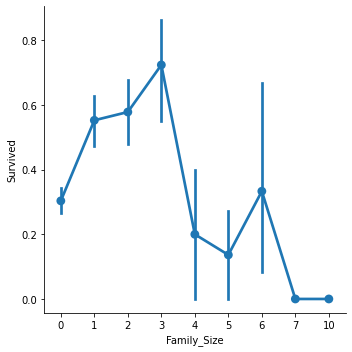

In [ ]:
df1['Family_Size'] = 0
df1['Family_Size'] = df1['Parch']+df1['SibSp']
sns.factorplot(x ='Family_Size', y ='Survived', data = df1)
plt.show()